<a href="https://colab.research.google.com/github/ayshahaneena/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('/content/creditcard.csv')

In [42]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
df.shape

(284807, 31)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [45]:
df['Class'] = df['Class'].astype('Int64')

In [46]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [47]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: Int64

This Data is highly Imbalanced

0 --> Normal Transaction

1 --> Fraudulent Transaction

In [48]:
other_values_in_class = df.loc[~df['Class'].isin([0,1]) , 'Class']
print(other_values_in_class)

Series([], Name: Class, dtype: Int64)


In [49]:
# Drop rows with missing values in 'Class' column
df.dropna(subset=['Class'], inplace=True)

'Class' column contains no missing values

In [50]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: Int64

In [51]:
legit = df[df.Class == 0 ]
fraud = df[df.Class == 1 ]

In [52]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


 **Under - Sampling**

In [53]:
legit = legit.sample(n=492)
print(legit.shape)

(492, 31)


In [54]:
df_new = pd.concat([legit , fraud] , axis=0)

In [55]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141368,84268.0,1.000027,0.354812,0.005820,2.325432,0.470928,0.407435,0.291225,0.198606,-1.141281,...,0.109333,0.153863,-0.086560,-0.319444,0.491573,0.109337,-0.027975,-0.000762,53.75,0
198351,132451.0,2.108130,0.278372,-2.007272,1.134096,1.021879,-0.528826,0.681007,-0.404134,0.134643,...,-0.009962,0.257927,-0.140201,-1.032590,0.630046,-0.427269,-0.009531,-0.071125,6.03,0
75994,56346.0,-1.396799,-1.434297,2.427444,-1.239878,0.490195,-0.545938,-0.774275,0.177960,-0.504545,...,-0.412901,-0.764780,-0.104670,0.026035,0.294921,0.963948,-0.222122,-0.164076,11.90,0
217037,140735.0,1.834001,-0.499015,-1.583018,0.962286,-0.225315,-0.394664,-0.409028,-0.076879,-0.388598,...,-0.365967,-0.692121,0.156866,0.421841,-0.196626,-0.711402,0.070207,0.045180,129.20,0
68026,52797.0,0.850519,-0.893120,0.112974,0.377749,-0.819218,-0.448068,0.063122,-0.093430,0.780861,...,-0.218013,-1.027656,-0.155363,-0.077124,0.169358,0.851660,-0.116169,0.038197,232.94,0


In [56]:
df_new.shape

(984, 31)

In [57]:
df_new['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: Int64

<Axes: xlabel='Class', ylabel='Count'>

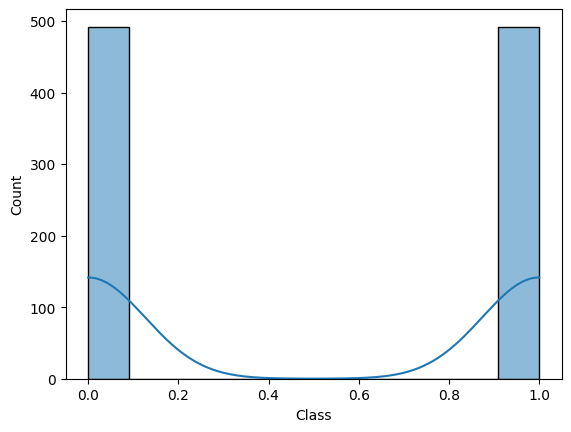

In [58]:
sns.histplot(df_new , x = df_new['Class'] , kde=True)

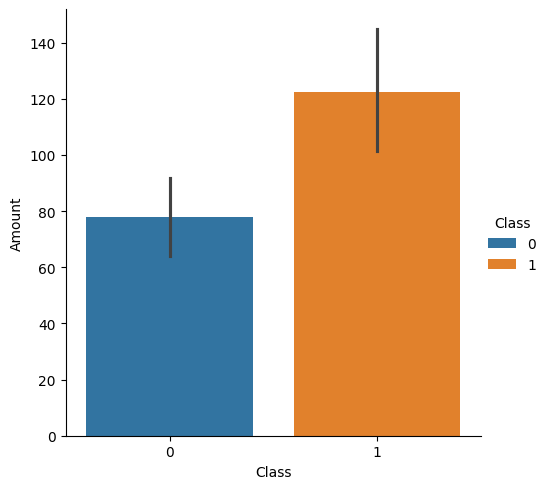

In [69]:
sns.catplot(data= df_new , x = 'Class', y ='Amount',hue= 'Class' , kind= 'bar')

Fraudulent Transactions are largely happened on higher Amounts

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_new['Amount'] = scaler.fit_transform(df_new[['Amount']])


In [73]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141368,84268.0,1.000027,0.354812,0.005820,2.325432,0.470928,0.407435,0.291225,0.198606,-1.141281,...,0.109333,0.153863,-0.086560,-0.319444,0.491573,0.109337,-0.027975,-0.000762,-0.216130,0
198351,132451.0,2.108130,0.278372,-2.007272,1.134096,1.021879,-0.528826,0.681007,-0.404134,0.134643,...,-0.009962,0.257927,-0.140201,-1.032590,0.630046,-0.427269,-0.009531,-0.071125,-0.439052,0
75994,56346.0,-1.396799,-1.434297,2.427444,-1.239878,0.490195,-0.545938,-0.774275,0.177960,-0.504545,...,-0.412901,-0.764780,-0.104670,0.026035,0.294921,0.963948,-0.222122,-0.164076,-0.411631,0
217037,140735.0,1.834001,-0.499015,-1.583018,0.962286,-0.225315,-0.394664,-0.409028,-0.076879,-0.388598,...,-0.365967,-0.692121,0.156866,0.421841,-0.196626,-0.711402,0.070207,0.045180,0.136332,0
68026,52797.0,0.850519,-0.893120,0.112974,0.377749,-0.819218,-0.448068,0.063122,-0.093430,0.780861,...,-0.218013,-1.027656,-0.155363,-0.077124,0.169358,0.851660,-0.116169,0.038197,0.620949,0


In [74]:
df_new.shape

(984, 31)

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [77]:
x = df_new.drop(columns='Class')
y = df_new['Class']

In [78]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

Over Sampling using SMOTE

In [79]:
smote = SMOTE()
x_train_smote , y_train_smote = smote.fit_resample(x_train , y_train)

Model Training

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train_smote , y_train_smote)

LogisticRegression()

In [82]:
y_pred = model.predict(x_test)

Model Evaluation

In [95]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

print('Classification Report: \n', classification_report(y_test , y_pred))
print('------------------------------------------------------')
print('Accuracy Score:', accuracy_score(y_test , y_pred))
print('------------------------------------------------------')
print('Confusion Matrix: \n' ,  confusion_matrix(y_test , y_pred))
print('------------------------------------------------------')

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        99
         1.0       0.96      0.88      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

------------------------------------------------------
Accuracy Score: 0.9187817258883249
------------------------------------------------------
Confusion Matrix: 
 [[95  4]
 [12 86]]
------------------------------------------------------


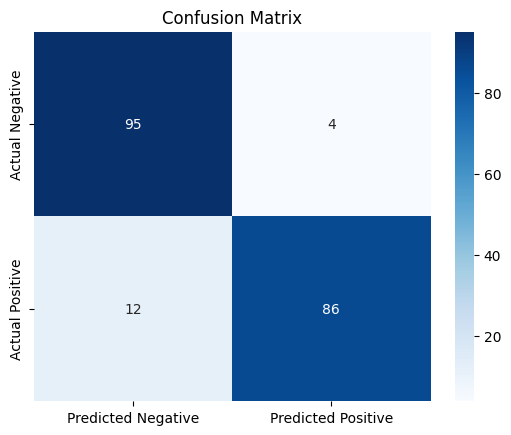

In [92]:
sns.heatmap(confusion_matrix(y_test , y_pred) , annot= True , cmap= 'Blues' ,
            xticklabels =['Predicted Negative' , 'Predicted Positive'] ,
            yticklabels =['Actual Negative' , 'Actual Positive']
            )
plt.title('Confusion Matrix')
plt.show()